<a href="https://colab.research.google.com/github/Nawapat2541/Multi_Conj_Grad_Desc_Minima/blob/main/Multi_Conj_Gradient_Descent_Minima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [44]:
# 3x^2 + 4y^2 + 7xy + 9x + 2y
objective_function2 = lambda x: 3*x[0]**2 + 4*x[1]**2 + 7*x[0]*x[1] + 9*x[0] + 2*x[1]

In [32]:
def derivative(input_fuction, x):
  '''
  return derivative of function of x
  '''
  listX = [item for item in x]
  h = 0.0001
  result = []
  for index , value in enumerate(x):
    # result[0] = (input_fuction(x + h , y) - input_fuction(x , y)) / h
    listX[index] =  listX[index] + h
    result.append((input_fuction(listX) - input_fuction(x)) / h)
    listX = [item for item in x]

  # result ที่มีหลายมิติ
  return result

In [45]:
def bowl() -> None:
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 50
    x1 = list(np.linspace(-5, 5, size))
    x2 = list(np.linspace(-5, 5, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            input = [x1[i,j] , x2[i,j]]
            zs[i,j] = objective_function2(input)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, linewidth=0 ,cmap='gist_rainbow')
    fig.show()
    return x1, x2, zs

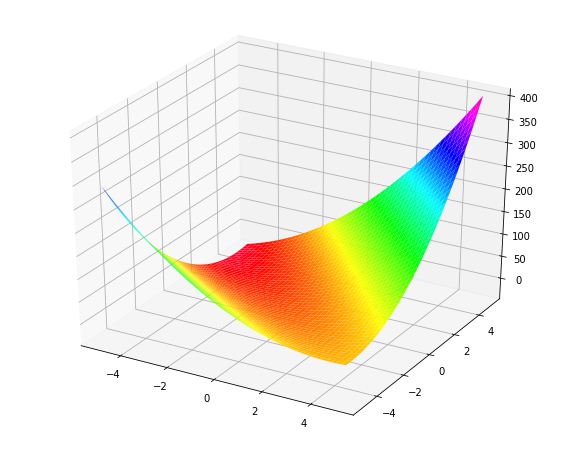

In [46]:
x1, x2, zs = bowl()

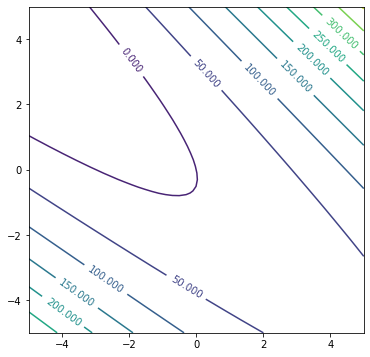

In [47]:
def contoursteps(x1, x2, zs, steps=None, round=0):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()
    # plt.savefig(f'img/gif_{round}.png')
contoursteps(x1, x2, zs)

In [35]:
def metrix(listData):
  return np.matrix(listData)

In [36]:
def deMetrix(metrix):
  return metrix.tolist()[0]

[-1.8334368540005048, -0.9167184270002524]
[-0.7003105620015144, -0.3501552810007572]
[-1.4006211240030284, -0.7003105620015142]
[-0.9678053940055522, -0.4839026970027761]
[-0.7003105620015144, -0.3501552810007572]
[-0.865631459994953, -0.4328157299974765]
[-0.7634575259843536, -0.3817287629921768]
[-0.8266044899671928, -0.4133022449835964]
[-0.7875775199394327, -0.39378875996971635]
[-0.8116975138945118, -0.4058487569472559]


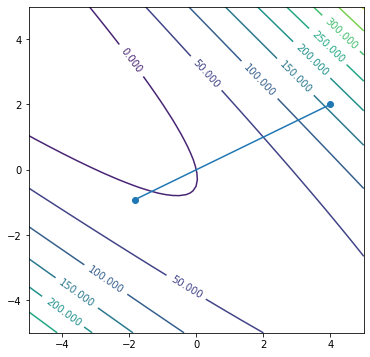

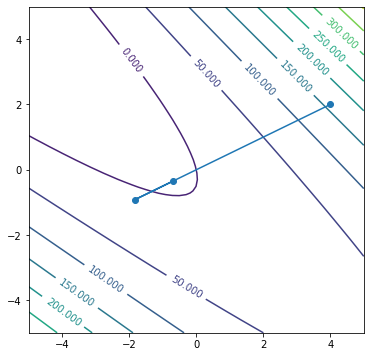

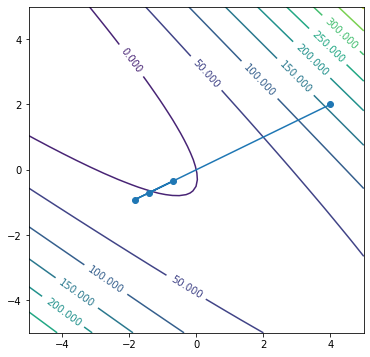

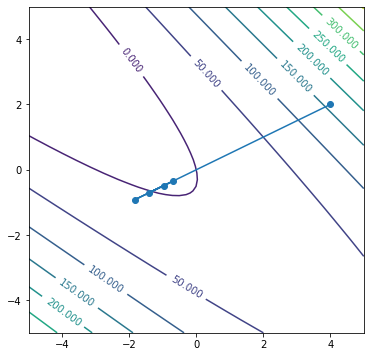

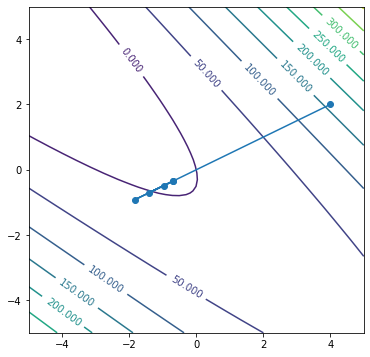

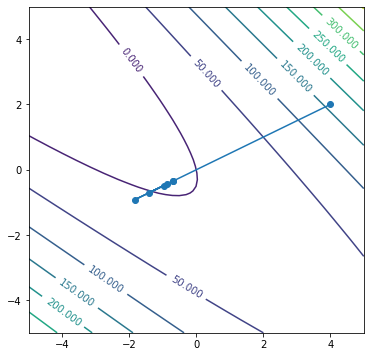

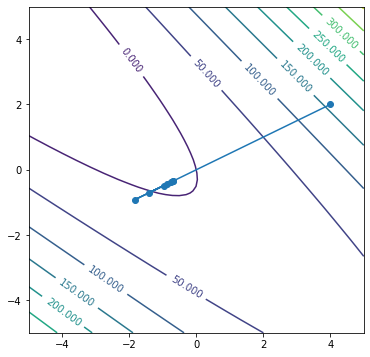

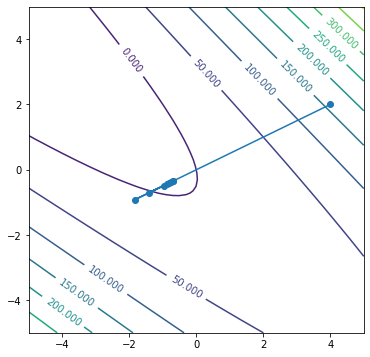

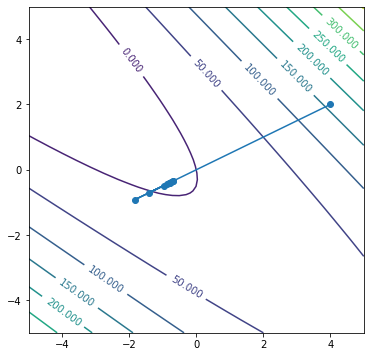

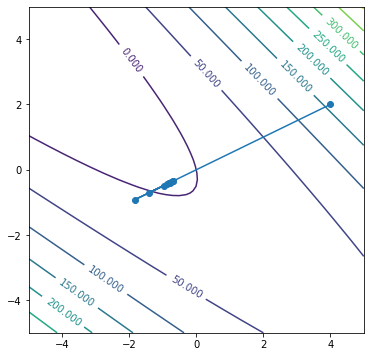

In [48]:
x = [4,2]
xn = [-4,-2]
steps = [(4.0, 2.0)]
i = 0
imax = 10

#golden_section
golden_section = ((5**(1/2)) + 1) / 2
a , b = metrix(x) , metrix(xn)
c = b - (b - a) / golden_section
d = a + (b - a) / golden_section
alpha  = 1.2
while i < imax :
    # golden section method
    # print(a,b,c,d)
    # print(deMetrix(a),deMetrix(b),deMetrix(c),deMetrix(d))

    if objective_function2(deMetrix(c)) < objective_function2(deMetrix(d)):
      b = d
    else:
      a = c

    c = b - (b - a) / golden_section
    d = a + (b - a) / golden_section

    # steps.append((b + a) / 2)
    result = deMetrix(alpha * (b + a) / 2)
    print(result)
    steps.append((result[0], result[1]))
    i += 1
    contoursteps(x1, x2, zs, steps, i)

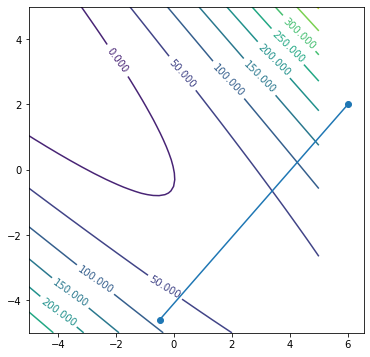

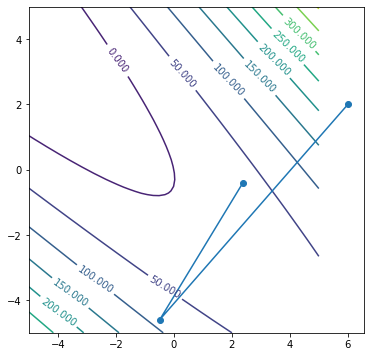

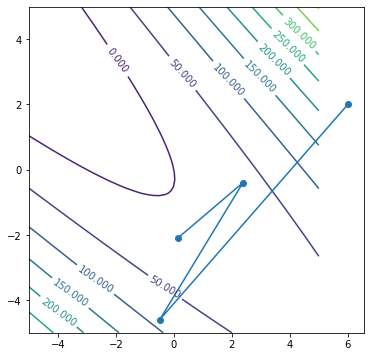

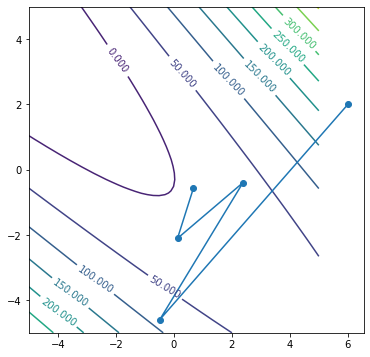

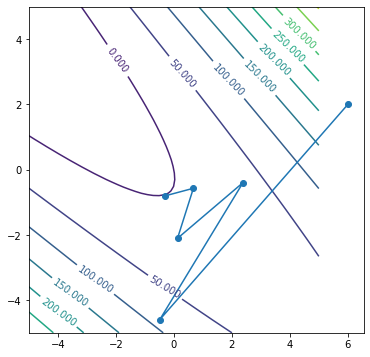

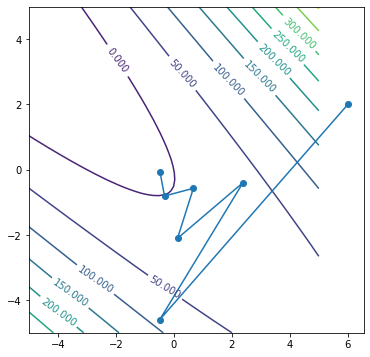

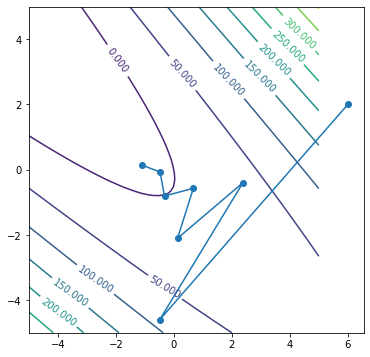

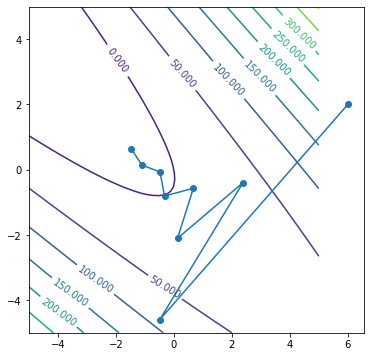

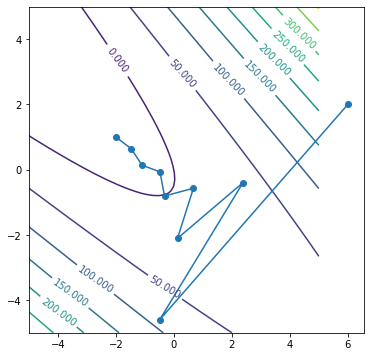

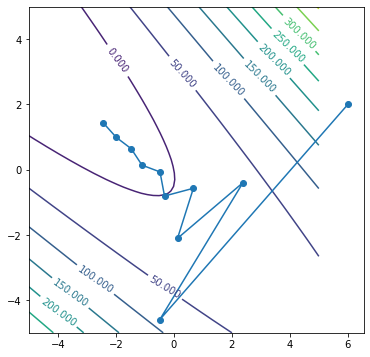

In [49]:
# Liner search -> not change learnign_rate
x = [6,2]
steps = [(6.0, 2.0)]
i = 0
imax = 10
error = 0.01
learnign_rate = 0.1
learnign_rate0 = learnign_rate
mx = metrix(x)
while i < imax :
    # if (learnign_rate > eps**2 * learnign_rate0):
    #   print("learnign_rate not change ")
    #   break
    if (i != 0):
      mx = metrix(mx) # handle first round
    mx = mx - 1.1 * (learnign_rate * metrix(derivative(objective_function2,deMetrix(mx))))
    mx = deMetrix(mx)
    steps.append((mx[0], mx[1]))
    # learnign_rate = derivative(objective_function2,x) - (objective_function2(x) * x)
    i += 1
    contoursteps(x1, x2, zs, steps, i)